In [2]:
! pip install torchsummary

In [3]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader , Dataset
#from torchsummary import summary
from sklearn.model_selection import train_test_split
from torchsummary import summary
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

device='cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [4]:
pip show torch

Name: torch
Version: 2.5.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /home/manas/miniconda3/envs/pytorch/lib/python3.11/site-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: torchaudio, torchvision
Note: you may need to restart the kernel to use updated packages.


In [5]:
import torch  
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))  # only if CUDA is available


2.5.1+cu121
True
NVIDIA GeForce RTX 4050 Laptop GPU


In [6]:
data_df = pd.read_csv('/home/manas/Downloads/riceClassification.csv')
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [7]:
data_df.dropna(inplace=True)

In [8]:
data_df

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [9]:
data_df['Class'].unique()

array([1, 0])

Text(0, 0.5, 'Count')

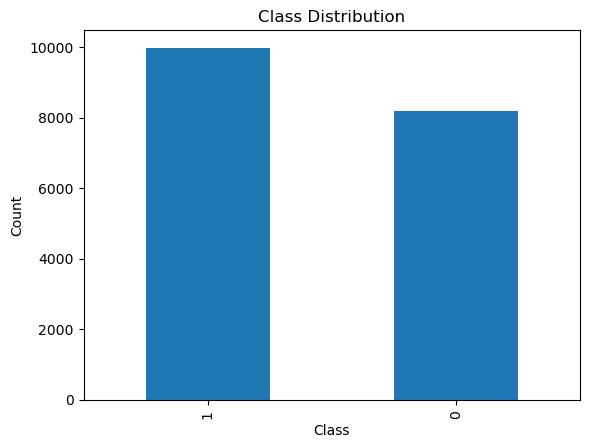

In [10]:
data_df['Class'].value_counts()
data_df['Class'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

In [11]:
data_df.drop(columns=['id'], inplace=True)
data_df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [12]:
print(data_df.shape)

(18185, 11)


In [13]:
original_data = data_df.copy()

In [14]:
#Normalization of the data
for col in data_df.columns:
    if col != 'Class':
        data_df[col] = (data_df[col])/ (data_df[col].max()) 
        
data_df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1
...,...,...,...,...,...,...,...,...,...,...,...
18180,0.573262,0.811219,0.618156,0.971489,0.545785,0.757140,0.562384,0.654774,0.733291,0.744543,0
18181,0.742899,0.925674,0.704314,0.971683,0.709121,0.861916,0.730296,0.758107,0.708884,0.745661,0
18182,0.623408,0.844800,0.640916,0.972058,0.593296,0.789562,0.633098,0.673049,0.754720,0.747830,0
18183,0.583741,0.826356,0.623551,0.972748,0.562227,0.764030,0.555396,0.675248,0.702103,0.751874,0


In [15]:
X=np.array(data_df.iloc[:,:-1])
y=np.array(data_df.iloc[:,-1])

In [16]:
X.shape
 

(18185, 10)

In [17]:
y.shape

(18185,)

In [18]:
print(y)

[1 1 1 ... 0 0 0]


In [19]:
print(data_df.iloc[:,-1])

0        1
1        1
2        1
3        1
4        1
        ..
18180    0
18181    0
18182    0
18183    0
18184    0
Name: Class, Length: 18185, dtype: int64


In [20]:
y = np.array(data_df.iloc[:, -1]).reshape(-1, 1)
print(y)


[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [21]:
print(y.shape)

(18185, 1)


In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [23]:
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.5)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(12729, 10)
(2728, 10)
(2728, 10)


In [24]:
#We need to convert our data into pytorch data set object
#Converts raw data into a PyTorch Dataset object for efficient processing.
class RiceDataset(Dataset):
    def __init__(self,X, y):
        self.X = torch.tensor(X,dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)


    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [25]:
training_data = RiceDataset(X_train, y_train)
validation_data = RiceDataset(X_val,y_val)
test_data = RiceDataset(X_test,y_test)

In [26]:
BATCH_SIZE = 8
EPOCHS = 10
HIDDEN_NEURONS = 10
LR = 1e-3

In [27]:
train_dataloader=DataLoader(training_data, batch_size=BATCH_SIZE, shuffle=True)
validation_dataloader=DataLoader(validation_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader=DataLoader(test_data, batch_size=BATCH_SIZE,shuffle=True)

In [28]:
for x,y in train_dataloader:
    print(x)
    print("====================")
    print(y)
    break



tensor([[0.7516, 0.7850, 0.8305, 0.9093, 0.7093, 0.8670, 0.8901, 0.6818, 0.8868,
         0.5363],
        [0.8454, 0.8292, 0.8891, 0.9057, 0.8006, 0.9195, 0.8541, 0.7236, 0.8856,
         0.5292],
        [0.5963, 0.8137, 0.6413, 0.9669, 0.5720, 0.7722, 0.6416, 0.6604, 0.7497,
         0.7198],
        [0.6211, 0.8097, 0.6687, 0.9601, 0.5900, 0.7881, 0.6142, 0.6647, 0.7709,
         0.6870],
        [0.7874, 0.8185, 0.8385, 0.9176, 0.7498, 0.8873, 0.8963, 0.7074, 0.8629,
         0.5538],
        [0.5986, 0.8256, 0.6410, 0.9690, 0.5701, 0.7737, 0.5238, 0.6711, 0.7289,
         0.7307],
        [0.5770, 0.8566, 0.5944, 0.9825, 0.5541, 0.7596, 0.7098, 0.6826, 0.6792,
         0.8176],
        [0.6278, 0.8777, 0.6218, 0.9803, 0.5943, 0.7923, 0.5852, 0.6917, 0.7196,
         0.8008]])
tensor([[0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1]])


In [29]:
#Model Architecture
#The neural network structure and data flow.

class MyModel(nn.Module):
    def __init__(self):

        super(MyModel, self).__init__()

        self.input_layer = nn.Linear(X.shape[1], HIDDEN_NEURONS)
        self.linear = nn.Linear(HIDDEN_NEURONS, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.input_layer(x)
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

In [30]:

model = MyModel().to(device)
summary(model, (X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [31]:
criterion = nn.BCELoss()                     # Measures how wrong predictions are (0 = perfect)
optimizer = Adam(model.parameters(), lr=LR)  # Updates weights to make predictions better


In [32]:
print(criterion)

BCELoss()


In [33]:
print(optimizer)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


In [ ]:
#All tensor involved in computation must be on the same device

In [ ]:
# Prepare the model
# Feed data to the model
# Calculate how wrong it is (loss)
# Improve the model (backprop + optimizer)
# Evaluate without training (validation)


total_loss_train_plot = []
total_loss_validation_plot = []
total_acc_train_plot = []
total_acc_validation_plot = []

for epoch in range(EPOCHS):
    total_acc_train = 0
    total_loss_train = 0
    total_acc_val = 0
    total_loss_val = 0
    ## Training and Validation
    for data in train_dataloader:

        inputs, labels = data
        inputs = inputs.to(device)
        labels= labels.to(device)

        prediction = model(inputs).squeeze(1)

        batch_loss = criterion(prediction, labels)

        total_loss_train += batch_loss.item()

        acc = ((prediction).round() == labels).sum().item()

        total_acc_train += acc

        batch_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    ## Validation
    with torch.no_grad():
        for data in validation_dataloader:
            inputs, labels = data

            prediction = model(inputs).squeeze(1)

            batch_loss = criterion(prediction, labels..squeeze(1))


            total_loss_val += batch_loss.item()

            acc = ((prediction).round() == labels).sum().item()

            total_acc_val += acc

    total_loss_train_plot.append(round(total_loss_train/1000, 4))
    total_loss_validation_plot.append(round(total_loss_val/1000, 4))
    total_acc_train_plot.append(round(total_acc_train/(training_data.__len__())*100, 4))
    total_acc_validation_plot.append(round(total_acc_val/(validation_data.__len__())*100, 4))

    print(f'''Epoch no. {epoch + 1} Train Loss: {total_loss_train/1000:.4f} Train Accuracy: {(total_acc_train/(training_data.__len__())*100):.4f} Validation Loss: {total_loss_val/1000:.4f} Validation Accuracy: {(total_acc_val/(validation_data.__len__())*100):.4f}''')
    print("="*50)

ValueError: Using a target size (torch.Size([8, 1])) that is different to the input size (torch.Size([8])) is deprecated. Please ensure they have the same size.